## Gentle Introduction to Chi square test for independence

https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95

The Chi-square test for independence is also called Pearson’s chi-square test. There is three ways to use chi-square.
- Bondad del ajuste/Goodness-of-fit: how different your data is to the expected value
- Test de independencia/test for independence: shows how two sets of data are independent of each other
- Test de homogeneidad/test for homogeneity: determines if two or more populations have the same distribution of a single categorical variable.

### Chi-square test for independence
First, the libraries:

In [1]:
from scipy.stats import chi2_contingency  # this is the one we will use 
from scipy.stats import chisquare         # this is used for goodness-to-fit tests
import pandas as pd
import numpy as np
from IPython.display import Image         # para incluir imagenes local

First of all we will create the sample data.  Let’s say we collected data on the favorite color of T-shirts for men and women. We want to find out whether color and gender are independent or not. We create a small sample data using the Pandas dataframe and we will store our data in a variable called tshirts.

In [2]:
tshirts = pd.DataFrame(
    [
        [48,22,33,47],
        [35,36,42,27]
    ],
    index=["Male","Female"],
    columns=["Black","White","Red","Blue"])
tshirts

,Black,White,Red,Blue
Male,48,22,33,47
Female,35,36,42,27


### chi2_contingency

Para un número finito de categorías o valores que nuestro estadístico puede tomar, definimos la chi cuadrada como el sumatorio por cada categoría de:

````latex notation````
\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} \\
\text{Donde O es el numero de veces (muestras) que aparece esa categoría en nuestra muestra y E es el esperado.}
\end{equation}


SciPy’s chi2_contingency() returns four values.

- 𝜒2 value: The 𝜒2 equation tells us to find the square of the difference between the actual value and expected value and divide it by the expected value. Then add all together to find the 𝜒2 value.
- p-value:
- degree of freedom/ grados de libertad: they are the number of categories in our sample minus one if its a unidimensional array (goodness of fit). For example: throwing a coin would be 2-1=1 degree of freedom, throwing a dice would be 5 dof. Our own sample of colors as is a bidimensional array; this is calculated as dof = (the number of rows -1) x (the number of columns -1)
- expected values/contingency table: You calculate the expected values from the observed data as if they were evenly distributed, using the following formula: 
\begin{equation}
\chi^2=\frac{rowTotal * columnTotal}{grandTotal} \\
\end{equation}
expected value = (row total x column total)/


In [3]:
chi2_contingency(tshirts)

(11.56978992417547,
 0.00901202511379703,
 3,
 array([[42.93103448, 30.        , 38.79310345, 38.27586207],
        [40.06896552, 28.        , 36.20689655, 35.72413793]]))

Let's print all this a little neater. 
First the original table, then the calculations


In [4]:
tshirts

,Black,White,Red,Blue
Male,48,22,33,47
Female,35,36,42,27


In [5]:
dataarray=chi2_contingency(tshirts)
print ("𝜒2: {}".format(dataarray[0]))
print ("p-value: {}".format(dataarray[1]))
print ("degrees of freedom: {}".format(dataarray[2]))
expected_tshirts = pd.DataFrame(
    data=dataarray[3], 
    index=["Male","Female"],
    columns=["Black","White","Red","Blue"]
).round(2)

expected_tshirts

𝜒2: 11.56978992417547
p-value: 0.00901202511379703
degrees of freedom: 3


,Black,White,Red,Blue
Male,42.93,30.0,38.79,38.28
Female,40.07,28.0,36.21,35.72


First of all, the calculation of the contingency table, if we were to do it manually would be:

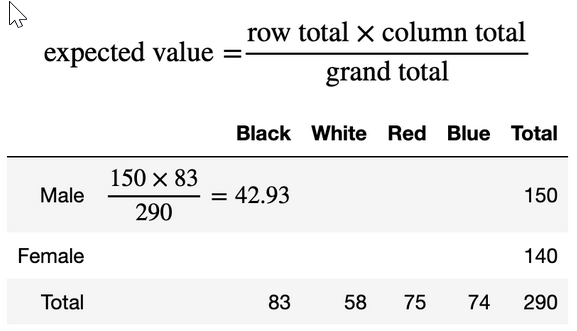

In [6]:
Image("./contingency_table.png")

The 𝜒2 equation tells us to find the square of the difference between the actual value and expected value and divide it by the expected value. Then add all together to find the 𝜒2 value. In this case we add both the male and female rows as if we had male-black, female-black, ... categories
Having already the contingency table/expected values calculated it is easy to accomplish:

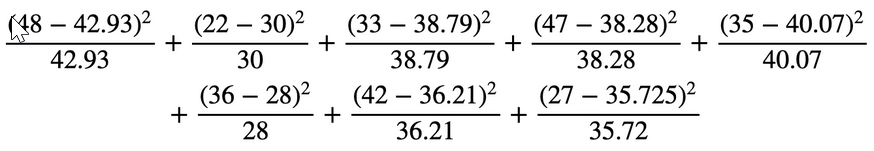

In [7]:
Image("./chi_cuadrado.png")

### P value

We need to explain this a little more

- null hypothesis (H0): The null hypothesis assumes there is ‘no effect’ or ‘relationship’ by default. For example: if you are testing if a drug treatment is effective or not, then the null hypothesis will assume there is not difference in outcome between the treated and untreated groups. It simply implies the absence of an effect. For chi square tests it means that there is no difference between expected frequencies and observed frequencies. Its counterpart is the Alternate hypothesis (HA) 
- The P Value basically helps to answer the question: ‘Does the data really represent the observed effect?’. This leads us to a more mathematical definition of P-Value: the P Value is the probability of seeing the effect(E) when the null hypothesis is true. 
\begin{equation}
PValue=P(E|H0) 
\end{equation}
 
When the p-value is low enough, we reject the null hypothesis and conclude the observed effect holds. This level of ‘low enough’ cutoff is called the alpha level, and you need to decide it before conducting a statistical test.
the result we have p-value: 0.00901202511379703 is less than the 0.05 so we reject the H0 and conclude the variables have relation

## Critical values

Critical values are the values that have an especific cummulative probability p; that is chi2.cdf(critical_value, dof) = p 
Usually youwould need to use tables to get them, but in jupyter, in order to find critical values, you simply need to import chi2 from scipy.state and define probability from the level of significance, 1%, 5% 10%, etc. p = (1-s)


In [35]:
from scipy.stats import chi2
significance = 0.01
p = 1 - significance
dof = chi2_contingency(tshirts)[2]
critical_value = chi2.ppf(p, dof)
print ("dof: {},   significance: {}, critical value: {}".format(dof, significance, critical_value))
print ("dof: {},   significance: {}, critical value: {}".format(2, 0.05, chi2.ppf(0.95, 2))) #another example


dof: 3,   significance: 0.01, critical value: 11.344866730144373
dof: 2,   significance: 0.05, critical value: 5.991464547107979


In our case the critical value is about 11.34. You can confirm with this value using cdf. The following will output 0.01 (1-p, the significance). 

In [37]:
p = chi2.cdf(critical_value, dof) #Cumulative distribution function
1-p

0.010000000000000009

## The null and alternative hypotheses

Chi-square test requires to state the null hypothesis, H0, and the alternative hypothesis, H1. The null hypothesis is the statement that our two variables are independent. The alternative hypothesis is the statement that they are not independent.
If the calculated Chi-square is greater than the critical value for our desired significance we reject the null hypothesis.

Also, if the p-value is less than our desired p-value (say. 5%), and it is we also reject the H0

In [38]:
tshirts

,Black,White,Red,Blue
Male,48,22,33,47
Female,35,36,42,27


In [44]:
chi, pval, dof, dataarray=chi2_contingency(tshirts)
print ("𝜒2: {}".format(chi))
print ("p-value: {}".format(pval))
print ("degrees of freedom: {}".format(dof))
expected_tshirts = pd.DataFrame(
    data=dataarray, 
    index=["Male","Female"],
    columns=["Black","White","Red","Blue"]
).round(2)

expected_tshirts

𝜒2: 11.56978992417547
p-value: 0.00901202511379703
degrees of freedom: 3


,Black,White,Red,Blue
Male,42.93,30.0,38.79,38.28
Female,40.07,28.0,36.21,35.72


In [49]:

significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)

print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

chi=3.903884, critical value=5.991465

At 0.05 level of significance, we accept the null hypotheses. They are independent.


## EJERCICIO: del curso de udemi.
Prueba de independencia de que los estudios elegidos son independientes de género.
Definimos el dataframe

In [47]:
estudios = pd.DataFrame(
    [
        [68, 52, 80],
        [28,37,35]
    ],
    index=["Chicos","Chicas"],
    columns=["Matemáticas","Arte","Literatura"])
estudios

,Matemáticas,Arte,Literatura
Chicos,68,52,80
Chicas,28,37,35


En caso de ser independientes, deberian seguir de cerca a la matriz de valores esperados/matriz de contingencia

In [48]:
chi, pval, dof, dataarray=chi2_contingency(estudios)
print ("𝜒2: {}".format(chi))
print ("p-value: {}".format(pval))
print ("degrees of freedom: {}".format(dof))
estudios_esperados = pd.DataFrame(
    data=dataarray, 
    index=["Chicos","Chicas"],
    columns=["Matemáticas","Arte","Literatura"]
).round(2)

estudios_esperados

𝜒2: 3.9038837322911575
p-value: 0.14199806245663096
degrees of freedom: 2


,Matemáticas,Arte,Literatura
Chicos,64.0,59.33,76.67
Chicas,32.0,29.67,38.33


In [50]:

significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)

print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

chi=3.903884, critical value=5.991465

At 0.05 level of significance, we accept the null hypotheses. They are independent.
